In [1]:
import os
import json
import pandas as pd
from src.vycisti import vycisti
from src.tabulka import tabulka
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
df = vycisti(df, opravy)

2023/06/13 12:57:17 z 4555 řádků odstraněno 133. Aktuální dataframe má 4422 řádků.


In [2]:
df = df.explode("Lokace")

In [3]:
df["Lokace"] = df["Lokace"].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

In [4]:
df = df.explode("Lokace")

In [5]:
def lokace_cista(x):
    try: 
        return x.split(" (")[0]
    except:
        return x

In [6]:
df["Lokace čistá"] = df["Lokace"].apply(lambda x: lokace_cista(x))

## Explorace

<Axes: xlabel='Copyright'>

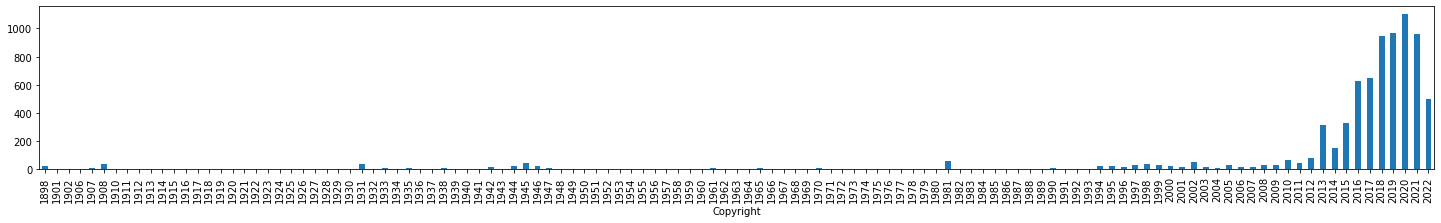

In [7]:
df.groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

<Axes: xlabel='Copyright'>

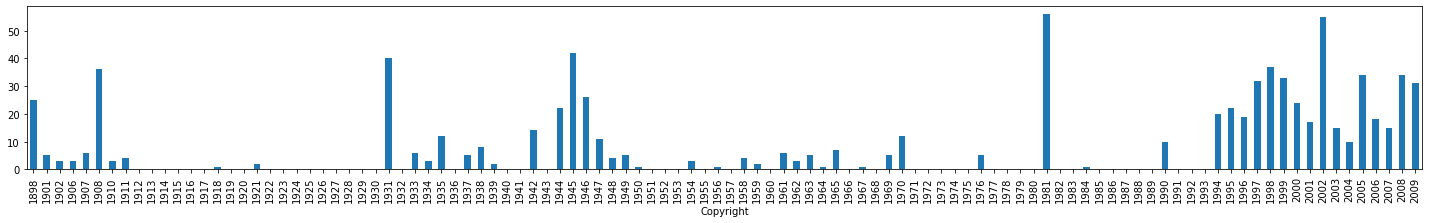

In [8]:
df[df["Copyright"] < 2010].groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

## Čištění

In [9]:
df.groupby("Lokace")["Film"].nunique().nlargest(300).index.to_list()

['Praha',
 'Česká republika',
 'Praha (Česká republika)',
 'Nové Město (Praha)',
 'Slovensko',
 'Staré Město (Praha)',
 'Vltava (Praha)',
 'Malá Strana (Praha)',
 'Hradčany (Praha)',
 'Vinohrady (Praha)',
 'Holešovice (Praha)',
 'Žižkov (Praha)',
 'Bubeneč (Praha)',
 'Dejvice (Praha)',
 'Smíchov (Praha)',
 'Bratislava (Slovensko)',
 'Francie',
 'Nusle (Praha)',
 'Václavské náměstí (Nové Město)',
 'Staroměstské náměstí (Staré Město)',
 'Brno (Česká republika)',
 'Karlín (Praha)',
 'Josefov (Praha)',
 'Německo',
 'Itálie',
 'Letná (Praha)',
 'Pražský hrad (Hradčany)',
 'Rakousko',
 'Ruzyně (Praha)',
 'Národní třída (Nové Město)',
 'Podolí (Praha)',
 'Polsko',
 'Karlův most (Vltava)',
 'Vršovice (Praha)',
 'Výstaviště (Bubeneč)',
 'Libeň (Praha)',
 'Spojené státy americké',
 'náměstí Jana Palacha (Josefov)',
 'USA',
 'Velká Británie',
 'bez exteriérů',
 'Bohnice (Praha)',
 'Krč (Praha)',
 'Malostranské náměstí (Malá Strana)',
 'Paříž (Francie)',
 'Vodičkova ulice (Nové Město)',
 'most Leg

In [10]:
def mesto(lokace):
    
    if isinstance(lokace, str):
    
        if "(" in lokace:

            zavorka = lokace.split("(")[1].replace(")","").strip()

            if zavorka in seznamy["praha"]:

                mesto = "Praha"

            elif zavorka == "Česká republika":
                
                mesto = lokace.split("(")[0].strip()
            
            else:

                mesto = zavorka

        else:
            
            mesto = lokace
            
        if "Česká republika, " in mesto:
                
            mesto = mesto.split(",")[1].strip()
            
    else:

        mesto = lokace         
        
    return(mesto)

In [11]:
mesto("Celetná ulice (Staré Město)")

'Praha'

In [12]:
df["Město"] = df["Lokace"].apply(lambda x: mesto(x))

In [13]:
df["Město"]

0                     Praha
0                     Praha
0                     Praha
1                     Praha
1                     Praha
               ...         
4554    ulice 17. listopadu
4554                Olomouc
4554                Olomouc
4554                Olomouc
4554                Olomouc
Name: Město, Length: 13039, dtype: object

In [14]:
df[df["Lokace"].str.contains("Česká republika, ",na=True)]["Lokace"]

40      NaN
42      NaN
43      NaN
44      NaN
45      NaN
       ... 
4499    NaN
4521    NaN
4523    NaN
4550    NaN
4551    NaN
Name: Lokace, Length: 3755, dtype: object

In [15]:
df[df["Lokace"] == "Praha"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Lokace čistá,Město
0,Alarm staroměstských hasičů (401719),Rakousko-Uhersko,1898,1898,premiéra 3. 7. 1898 (Výstava architektury a i...,1.0,[Jan Kříženecký (127419)],film,reportáž,"[dokumentární, distribuční]",Alarm staroměstských hasičů,Alarm staroměstských hasičů,Alarm of Old Town Firemen,Alarm pražských hasičů staroměstských / Poplac...,None,None,None,None,None,None,None,None,[Jan Kříženecký (127419)],None,None,None,None,None,None,None,None,None,None,None,None,Praha,None,"[Jan Kříženecký (127419), Josef Pokorný (96687)]",None,[Národní filmový archiv (92324)],None,krátkometrážní,35mm,1.26,černobílý,němý,None,česká,bez dialogů,bez titulků,bez titulků,None,"Poplach hasičů, od poplašného znamení zvoncem ...",None,None,None,None,None,None,None,None,None,17.0,bez titulků,Film byl natočen a promítán v pavilonu Český k...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nedochovaný,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1898,1898,Praha,Praha
1,Smích a pláč (395110),Rakousko-Uhersko,1898,1898,premiéra 07/1898 (Výstava architektury a inže...,1.0,[Jan Kříženecký (127419)],film,anekdota,"[hraný, distribuční]",Smích a pláč,Smích a pláč,Laughter and Tears,Pláč a smích / Tvář Švába-Malostranského / Sól...,None,[Josef Šváb-Malostranský (55291)],[on sám],None,None,[Josef Šváb-Malostranský (55291)],None,None,[Jan Kříženecký (127419)],None,None,None,None,None,None,None,None,None,None,None,None,Praha,None,"[Jan Kříženecký (127419), Josef Pokorný (96687)]",None,[Národní filmový archiv (92324)],[Národní filmový archiv (92324)],krátkometrážní,"[35mm, DCP 2-D]","[1.33, 1.26]",černobílý,němý,None,česká,bez dialogů,bez titulků,bez titulků,None,"Švábova tvář, natočená v detailu, předvádí mim...",None,None,None,None,None,None,None,None,None,17.0,bez titulků,Film byl natočen a promítán v pavilonu Český k...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Tears and Laughter / 

In [16]:
", ".join(df.groupby("Město")["Film"].nunique().nlargest(1000).index.to_list())

'Praha, Česká republika, Slovensko, Brno, Francie, Německo, Itálie, Polsko, Rakousko, Spojené státy americké, Bratislava, Plzeň, Ústí nad Labem, Liberec, Ostrava, Zlín, Kladno, USA, Velká Británie, bez exteriérů, Mělník, Beroun, Šumava, Hradec Králové, Jaroměř, Karlovy Vary, Krkonoše, Olomouc, Jizerské hory, Ukrajina, Litoměřice, Mladá Boleslav, Mostecko, New York, Paříž, Praha a okolí, Rusko, Slapy, Černošice, Španělsko, Doksy, Děčín, Kolín, Maďarsko, Mikulov, Most, Nizozemsko, Výstaviště, České Budějovice, Švýcarsko, Brandýs nad Labem, Brdy, Japonsko, Jihlava, Kalifornie, Kokořínsko, Kouřim, Pardubice, Sušice, Veltrusy, Vltava, Čína, Bechyně, Hluboká nad Vltavou, Holašovice, Jílové u Prahy, Karviná, Kroměříž, Králův Dvůr, Křivoklát, Lysá nad Labem, New York City, Norsko, Nymburk, Náchod, Poděbrady, Příbram, Slaný, Stodůlky, Telč, Troja, Vinařice, Vysoké Tatry, zámek Jezeří, zámek Ploskovice, Český Krumlov, Český ráj, Řecko, Austrálie, Bedřichov, Bosna a Hercegovina, Broumov, Chorvats

## Tak co teď?

In [17]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]
hcf = hcf[hcf["Copyright"] >= 2013]

In [18]:
hcf["Film"].nunique()

281

In [19]:
hcf[hcf["Město"] == "Brno"]["Lokace čistá"].value_counts()

Lokace čistá
Brno                                               11
Výstaviště                                          4
Černá Pole                                          2
Pisárky                                             2
hlavní nádraží                                      2
Zelný trh                                           2
Dominikánské náměstí                                1
klub Melodka /interiér/                             1
hala Malá Amerika                                   1
Kopečná ulice                                       1
Sukova ulice                                        1
Běhounská ulice                                     1
Pisárecká ulice                                     1
Pekařská ulice                                      1
Jezuitská ulice                                     1
ulice Dornych                                       1
Eleven club /interiér/                              1
Malinovského náměstí                                1
Váchova ulice  

In [20]:
lokace = pd.DataFrame(hcf[~hcf["Město"].isin(["Slovensko","Česká republika","Bratislava","Rakousko","Francie","Itálie"])].groupby("Město")["Film"].nunique().nlargest(10))
lokace["Město"] = lokace.index
lokace["Počet filmů"] = lokace["Film"]
lokace["Nejčastější lokace"] = lokace["Město"].apply(lambda x: hcf[(hcf["Město"].str.contains(x, na=False) & (~hcf["Lokace čistá"].str.contains(x, na=False)))]["Lokace čistá"].value_counts().idxmax())
lokace = lokace.drop(columns=["Film"])
lokace

,Město,Počet filmů,Nejčastější lokace
Město,,,
Praha,Praha,164,Nové Město
Brno,Brno,11,Výstaviště
Kladno,Kladno,11,Sládečkovo vlastivědné muzeum
Jaroměř,Jaroměř,10,Josefov
Mělník,Mělník,10,Olešno
Beroun,Beroun,8,lom Alkazar
Zlín,Zlín,8,Havlíčkovo nábřeží
Hradec Králové,Hradec Králové,7,okolí
Mladá Boleslav,Mladá Boleslav,7,Viničná ulice


In [21]:
tabulka(lokace, titulek="Nejčastější natáčecí lokace posledních 10 let", vysvetlivka="Srovnání zahrnuje celovečerní hrané filmy. Sloupec konkrétních lokací je jen orientační: co může být jednou označené jako Výstaviště, může být jindy uvedeno jako BVV či Pisárky.")

<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Nejčastější natáčecí lokace posledních 10 let</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Město</th><th class="text-nowrap">Počet filmů</th><th class="text-nowrap">Nejčastější lokace</th></tr></thead><tbody class="text-sm"><tr><td>Praha</td><td>164</td><td>Nové Město</td></tr><tr><td>Brno</td><td>11</td><td>Výstaviště</td></tr><tr><td>Kladno</td><td>11</td><td>Sládečkovo vlastivědné muzeum</td></tr><tr><td>Jaroměř</td><td>10</td><td>Josefov</td></tr><tr><td>Mělník</td><td>10</td><td>Olešno</td></tr><tr><td>Beroun</td><td>8</td><td>lom Alkazar</td></tr><tr><td>Zlín</td><td>8</td><td>Havlíčkovo nábřeží</td></tr><tr><td>Hradec Králové</td><td>7</td><td>okolí</td></tr><tr><td>Mladá Boleslav</td><td>7</td><td>Viničná ulice</td></tr><tr><td>Plzeň</td><td>7</td><td>rybník Bolevák</td></tr></tbody><tfoot><tr style="text-align: center;"><td colspan="100%">Srovnání za

In [22]:
hcf[hcf["Město"] == "Praha"].groupby("Lokace čistá")["Film"].nunique().nlargest(20)

Lokace čistá
Praha                156
Nové Město            49
Vltava                39
Vinohrady             27
Žižkov                27
Staré Město           26
Malá Strana           24
Hradčany              23
Holešovice            20
Smíchov               19
Bubeneč               18
Dejvice               18
Nusle                 18
Václavské náměstí     17
Karlín                14
Národní třída         12
Josefov               11
Podolí                11
Pražský hrad          11
Mánesův most          10
Name: Film, dtype: int64

In [23]:
df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_13832\3879034159.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)


Lokace
Česká republika                         198
Praha (Česká republika)                 137
Brno (Česká republika)                   24
Ostrava (Česká republika)                 7
Krkonoše (Česká republika)                6
Plzeň (Česká republika)                   6
Jaroměř (Česká republika)                 5
Jihlava (Česká republika)                 5
Jizerské hory (Česká republika)           5
Kolín (Česká republika)                   5
Olomouc (Česká republika)                 5
Veltrusy (Česká republika)                5
Zlín (Česká republika)                    5
Ústí nad Labem (Česká republika)          5
Beroun (Česká republika)                  4
Brdy (Česká republika)                    4
Doksy (Česká republika)                   4
Hradec Králové (Česká republika)          4
Slapy (Česká republika)                   4
Šumava (Česká republika)                  4
Broumov (Česká republika)                 3
Děčín (Česká republika)                   3
Hodonín (Česká republika)

In [24]:
df[(df["Město"] != "Praha") & (df["Lokace"].str.lower().str.contains("ulice", na=False))].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Viničná ulice (Mladá Boleslav)                                          5
Denisova ulice (Olomouc)                                                3
ulice (Olomouc)                                                         3
Hněvotínská ulice (Olomouc)                                             2
Husova ulice (Slaný)                                                    2
Kamýcká ulice (Suchdol)                                                 2
Kounicova ulice (Brno)                                                  2
Kozia ulice (Bratislava)                                                2
Křížkovského ulice (Olomouc)                                            2
Linecká ulice (Český Krumlov)                                           2
Mýtna ulice (Bratislava)                                                2
Nádražní ulice (Vrané nad Vltavou)                                      2
Pribinova ulice (Bratislava)                                            2
Univerzitní ulice (Olomouc)    

In [25]:
df[df["Lokace"].str.lower().str.contains("ulice", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Vodičkova ulice (Nové Město)                    12
ulice (Praha)                                   11
Pernerova ulice (Karlín)                         9
Bělohorská ulice (Břevnov)                       6
Lucerna (Vodičkova ulice)                        6
Pařížská ulice (Staré Město)                     6
Vinohradská ulice (Vinohrady)                    6
ulice Komunardů (Holešovice)                     6
Dejvická ulice (Dejvice)                         5
Hellichova ulice (Malá Strana)                   5
Jindřišská ulice (Nové Město)                    5
Koulova ulice (Dejvice)                          5
Nádražní ulice (Smíchov)                         5
Sněmovní ulice (Malá Strana)                     5
Spálená ulice (Nové Město)                       5
Tusarova ulice (Holešovice)                      5
Viničná ulice (Mladá Boleslav)                   5
ulice Na Pankráci (Nusle)                        5
Bartolomějská ulice (Staré Město)                4
Jankovcova ulice (Holešo

In [26]:
df[df["Lokace"].str.lower().str.contains("zámek", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
zámek Jezeří                                                        5
zámek Ploskovice                                                    5
zámek /skleníky/ (Veltrusy)                                         2
zámek Buchlovice                                                    2
zámek Dolní Beřkovice                                               2
zámek Krásný Dvůr                                                   2
zámek Milotice                                                      2
zámek Veltrusy                                                      2
Egyptský pavilon (zámek Veltrusy)                                   1
Poděbrady /zámek/ (Česká republika)                                 1
Roztoky u Prahy – zámek                                             1
Topoľčanský hrad (Topoľčianky – zámek                               1
Topoľčianky – zámek                                                 1
Zbraslavský zámek (Zbraslav)                                        1
kupole se sta

In [27]:
df[df["Lokace"].str.lower().str.contains("náměstí", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Václavské náměstí (Nové Město)                                                26
Staroměstské náměstí (Staré Město)                                            25
náměstí Jana Palacha (Josefov)                                                14
Malostranské náměstí (Malá Strana)                                            12
Hradčanské náměstí (Hradčany)                                                  9
Národní muzeum (Václavské náměstí)                                             7
Václavské náměstí (Praha)                                                      7
náměstí Republiky (Staré Město)                                                7
Karlovo náměstí (Nové Město)                                                   5
Loretánské náměstí (Hradčany)                                                  5
Rudolfinum (náměstí Jana Palacha)                                              5
Staroměstská radnice (Staroměstské náměstí)                                    5
náměstí Curieových (S

## Jaroměř pro vysílání

In [28]:
jaromer = hcf[hcf["Lokace"].str.contains("Jaroměř",na=False)].explode("Režie")[["Film","Copyright","Režie"]].drop_duplicates()
jaromer

,Film,Copyright,Režie
3920,Něžné vlny (400551),2013,Jiří Vejdělek (24168)
4061,Wilsonov (400602),2015,Tomáš Mašín (1495)
4219,Zahradnictví: Rodinný přítel (401671),2017,Jan Hřebejk (4831)
4221,Zahradnictví: Nápadník (401672),2017,Jan Hřebejk (4831)
4222,Zahradnictví: Dezertér (401670),2017,Jan Hřebejk (4831)
4386,Nabarvené ptáče (401962),2019,Alice Hurychová (81624)
4390,V zajetí sítě (401999),2019,Matěj Krátký (109159)
4453,Havel (402069),2020,Slávek Horák (80123)
4467,Šarlatán (402092),2020,Agnieszka Holland (12106)
4476,Casting na lásku (402062),2020,Eva Toulová (77526)


In [29]:
len(jaromer)

10